In [101]:
# Necessary imports.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import corner
from scipy.signal import savgol_filter

In [2]:
# Class, for easy referencing.

class Des_data:
    def __init__(self, filename_list):
        
        # Functionality for including multiple files,
        # as desaccess tends to split them up.
        for i in range(len(filename_list)):
        
            filename = filename_list[i]
            
            if i == 0:
                
                # Figure out which points have data in all 5 bands.
                # we'll only be working with those.
                self.data = pd.read_csv(filename)
                self.dropouts_g = self.data[self.data.G==99]
                self.dropouts_r = self.data[self.data.R==99]
                self.dropouts_i = self.data[self.data.I==99]
                self.dropouts_z = self.data[self.data.Z==99]
                self.dropouts_y = self.data[self.data.Y==99]

                self.no_dropouts = self.data[self.data.G!=99]
                self.no_dropouts = self.no_dropouts[self.no_dropouts.R!=99]
                self.no_dropouts = self.no_dropouts[self.no_dropouts.I!=99]
                self.no_dropouts = self.no_dropouts[self.no_dropouts.Z!=99]
                self.no_dropouts = self.no_dropouts[self.no_dropouts.Y!=99]
                
            else:
                newdata = pd.read_csv(filename)
                self.data = pd.concat([self.data, newdata])
                
                
                newdropouts_g = newdata[newdata.G==99]
                newdropouts_r = newdata[newdata.R==99]
                newdropouts_i = newdata[newdata.I==99]
                newdropouts_z = newdata[newdata.Z==99]
                newdropouts_y = newdata[newdata.Y==99]
                
                self.dropouts_g = pd.concat([self.dropouts_g, newdropouts_g])
                self.dropouts_r = pd.concat([self.dropouts_r, newdropouts_r])
                self.dropouts_i = pd.concat([self.dropouts_i, newdropouts_i])
                self.dropouts_z = pd.concat([self.dropouts_z, newdropouts_z])
                self.dropouts_y = pd.concat([self.dropouts_y, newdropouts_y])

                newno_dropouts = newdata[newdata.G!=99]
                newno_dropouts = newno_dropouts[newno_dropouts.R!=99]
                newno_dropouts = newno_dropouts[newno_dropouts.I!=99]
                newno_dropouts = newno_dropouts[newno_dropouts.Z!=99]
                newno_dropouts = newno_dropouts[newno_dropouts.Y!=99]
                
                self.no_dropouts = pd.concat([self.no_dropouts, newno_dropouts])
        
        # Save some of the more commonly-referenced values in some arrays.
        self.g = np.array(self.no_dropouts.MAG_AUTO_G_DERED)
        self.r = np.array(self.no_dropouts.MAG_AUTO_R_DERED)
        self.i = np.array(self.no_dropouts.MAG_AUTO_I_DERED)
        self.z = np.array(self.no_dropouts.MAG_AUTO_Z_DERED)
        self.y = np.array(self.no_dropouts.MAG_AUTO_Y_DERED)
        
        self.gerr = np.array(self.no_dropouts.MAGERR_AUTO_G)
        self.rerr = np.array(self.no_dropouts.MAGERR_AUTO_R)
        self.ierr = np.array(self.no_dropouts.MAGERR_AUTO_I)
        self.zerr = np.array(self.no_dropouts.MAGERR_AUTO_Z)
        self.yerr = np.array(self.no_dropouts.MAGERR_AUTO_Y)

        self.gr = self.g-self.r
        self.ri = self.r-self.i
        self.iz = self.i-self.z
        self.zy = self.z-self.y
        self.gi = self.g-self.i
        self.gz = self.g-self.z
        self.gy = self.g-self.y
        self.rz = self.r-self.z
        self.ry = self.r-self.y
        self.iy = self.i-self.y

        self.spread_g = np.array(self.no_dropouts.G_SPREAD)
        self.spread_r = np.array(self.no_dropouts.R_SPREAD)
        self.spread_i = np.array(self.no_dropouts.I_SPREAD)
        self.spread_z = np.array(self.no_dropouts.Z_SPREAD)
        self.spread_y = np.array(self.no_dropouts.Y_SPREAD)

        self.b = np.array(self.no_dropouts.GALACTIC_B)
        self.l = np.array(self.no_dropouts.GALACTIC_L)

        self.class_coadd = np.array(self.no_dropouts.EXTENDED_CLASS_COADD)
        self.class_wavg = np.array(self.no_dropouts.EXTENDED_CLASS_WAVG)

        self.spreaderr_g = np.array(self.no_dropouts.G_SPREADERR)
        self.spreaderr_r = np.array(self.no_dropouts.R_SPREADERR)
        self.spreaderr_i = np.array(self.no_dropouts.I_SPREADERR)
        self.spreaderr_z = np.array(self.no_dropouts.Z_SPREADERR)
        self.spreaderr_y = np.array(self.no_dropouts.Y_SPREADERR)

        
        
    def print_dropouts(self):
        print("{:.2f}% are G dropouts".format(len(self.dropouts_g)/len(self.data)*100 ))
        print("{:.2f}% are R dropouts".format(len(self.dropouts_r)/len(self.data)*100 ))
        print("{:.2f}% are I dropouts".format(len(self.dropouts_i)/len(self.data)*100 ))
        print("{:.2f}% are Z dropouts".format(len(self.dropouts_z)/len(self.data)*100 ))
        print("{:.2f}% are Y dropouts".format(len(self.dropouts_y)/len(self.data)*100 ))
        print("{:.2f}% are dropouts".format(((len(self.data)-len(self.no_dropouts))/len(self.data)*100 )))

In [3]:
# Read in data.
d1 = Des_data(["DES_test_4_wgalaxies_000001.csv","DES_test_4_wgalaxies_000002.csv"])

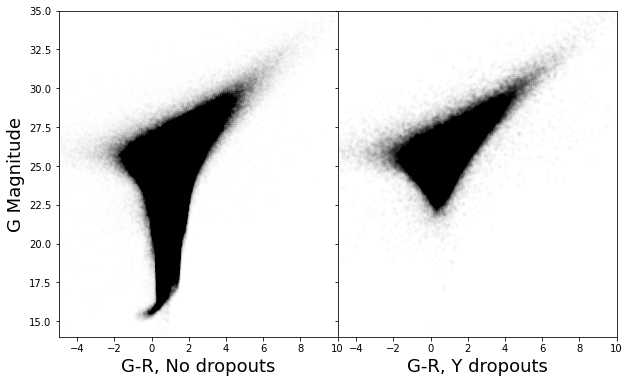

In [5]:
# A plot of how the g-r vs g plots look, with the y dropout data
# and the data with no dropouts.
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 6))

ax2.plot(np.array(d1.dropouts_y.MAG_AUTO_G_DERED-d1.dropouts_y.MAG_AUTO_R_DERED), np.array(d1.dropouts_y.MAG_AUTO_G_DERED), ".k", alpha=0.01)
ax1.plot(np.array(d1.g-d1.r), np.array(d1.g), ".k", alpha=0.002)

plt.subplots_adjust(wspace=0)

plt.xlim(-5, 10)
plt.ylim(14, 35)
ax2.set_xlabel("G-R, Y dropouts", fontsize=18)
ax1.set_xlabel("G-R, No dropouts", fontsize=18)
ax1.set_ylabel("G Magnitude", fontsize=18)
plt.savefig("dropouts_test_sample", dpi=300)

In [6]:
# Print the dropouts.
d1.print_dropouts()

3.34% are G dropouts
0.54% are R dropouts
0.24% are I dropouts
0.34% are Z dropouts
18.93% are Y dropouts
21.91% are dropouts


The following section concerns my simulations, described in S2.4.1 of the paper.

First, we have to generate a sample of planets with physically motivated masses using the stellar imf...

In [8]:


def pdf(x):
    """
    pdf of the initial mass function between 0.08 and 100 Msolar,
    a broken power law with p=-1.3 at low masses and p=-2.3 at 
    high masses
    """
    
    y = np.zeros(len(x))
    a =5.931317837773046
    y[x<0.5] = x[x<0.5]**-1.3 + 0.5**(-2.3) - 0.5**(-1.3) - 100**(-2.3)
    y[x>0.5] = x[x>0.5]**-2.3 - 100**(-2.3)
    y = y/a
    return y

def cdf(x):
    """
    cdf of the initial mass function between 0.08 and 100 Msolar,
    a broken power law with p=-1.3 at low masses and p=-2.3 at 
    high masses
    """
    y = np.zeros(len(x))
    a = 1/5.931317837773046
    b1 = 0.5**(-2.3) - 0.5**(-1.3) - 100**(-2.3)
    b2 = -100**(-2.3)
    y[x<0.5] = -a/0.3*x[x<0.5]**(-0.3) + a*b1*x[x<0.5] + a/0.3*(0.08)**(-0.3) - a*b1*0.08
    y[x>0.5] = -a/1.3*x[x>0.5]**(-1.3) + a*b2*x[x>0.5] + a/1.3*(0.50)**(-1.3) - a*b2*0.50 + \
               -a/0.3*0.5**(-0.3) + a*b1*0.5 + a/0.3*(0.08)**(-0.3) - a*b1*0.08
    return y

def generate_grid(n):
    """
    A very messy and slow method to generate a sample of n stellar
    masses using a grid-search method and the cdf.
    
    """
    masses = np.linspace(0.08, 100, 1000000)
    cdfs = cdf(masses)
    u = np.random.uniform(0, 1, n)
    idxs = np.searchsorted(cdfs, u)
    return masses[idxs]

0.13883423805236816


Let's compare the distribution of masses generated to the pdf...

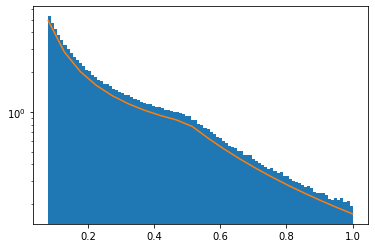

In [7]:
masses = generate_grid(1000000)


_, _, _ = plt.hist(masses, density=True, bins=100, range=(0.08, 1))
x = np.linspace(0.08, 1, 20)
plt.plot(x, pdf(x))
plt.yscale("log")


Not perfect, but close enough for me!

Next, let's find the luminosities of these objects.

In [77]:
def l_function(mass):
    """
    Estimates luminosity (in solar luminosities) given
    mass (in solar masses).
    """
    lum = np.zeros(len(mass))
    lum[mass<0.43] = 0.23*mass[mass<0.43]**2.3
    lum[mass>0.43] = mass[mass>0.43]**4
    return lum


Note that this is the total bolometric luminosity, not the luminosity in any particular band.  To compare to the data, we thus estimate the bolometric apparent magnitude of each object by adding up the flux in each individual grizY bands.  Note that this is only an estimate!

In [78]:
a = 4.83
l = 10**(a/2.5)*(10**(-d1.g[d1.class_coadd==0]/2.5)+\
                 10**(-d1.r[d1.class_coadd==0]/2.5)+\
                 10**(-d1.i[d1.class_coadd==0]/2.5)+\
                 10**(-d1.z[d1.class_coadd==0]/2.5)+\
                 10**(-d1.y[d1.class_coadd==0]/2.5))
mf = a-2.5*np.log10(l)

Finally, with these together, we can write a big function that produces one of those nifty number of stars seen vs magnitude plots.

In [109]:
def model_counts(theta, bins=np.linspace(13, 24, 30)):
    """
    Given parameters theta, calculate the number of stars
    as a function of magnitude.
    Returns: counts, errors
    
    """
    
    # Model parameters
    # d_max = the maximum distance of the stars, in kpc
    # logn_density = the logged number density of stars, in log(stars/pc^3)
    d_max, logn_density = theta
    
    # Convert everything to some more sane units.
    n_density = np.e**logn_density
    d_max = d_max*1000
    
    
    # The total number of stars should be equal to the volume of the
    # survey times the number density.  We also multiply by a term
    # to account for the fact that the DES does not survey the 
    # whole sky.
    n_stars = int(4/3 * np.pi * d_max**3 * n_density*5000/41253)
    
    
    # Allows us to average over multiple runs, but it makes this
    # slow so I set it to 1.
    n_runs = 1
    
    counts = np.zeros((n_runs, len(bins)-1))
    
    for i in range(n_runs):
        
        # Distances distributed as a random uniform sphere.
        d = np.random.uniform(0, 1, n_stars)**(1/3)*d_max
        
        # Masses distributed as IMF.
        masses = generate_grid(n_stars)
        
        # Find luminosity given masses.
        l = l_function(masses)

        # Calculate absolute magnitude, given luminosity.
        M = 4.83 - 2.5*np.log10(l)
        
        # Calculate apparent magnitude, given M and distance.
        m = M+5*np.log10(d/10)
        

        
        counts[i], _ = np.histogram(m, bins=bins)

    return np.mean(counts, axis=0), np.sqrt(np.mean(counts, axis=0))

Let's make a little plot, to see how this works.

Text(0, 0.5, 'Counts')

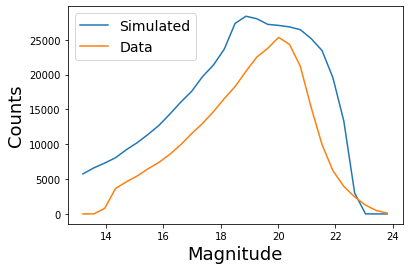

In [110]:
bins=np.linspace(13, 24, 30)

theta = (1, np.log(1.e-3))
counts, std = model_counts(theta)

counts_d, _ = np.histogram(mf, bins=bins)

plt.plot((bins[1:]+bins[:-1])/2, counts, label="Simulated")
plt.plot((bins[1:]+bins[:-1])/2, counts_d, label="Data")

plt.xlabel("Magnitude", fontsize=18)
plt.legend(fontsize=14)
plt.ylabel("Counts", fontsize=18)


It looks like we are able to, generally, reproduce the vague shape of what we see in the data.

Let's see what parameters of this model fit to our actual observations, with a MCMC sampler.

In [111]:
def log_likelihood(theta, counts_d):
    model, std = model_counts(theta)
    sigma2 = np.sqrt(np.sqrt(counts_d)**2 + std**2)
    return -0.5 * np.sum((counts_d - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    d_max, logn_density = theta
    if d_max>0 and logn_density<0:
        return 0.0
    return -np.inf

def log_probability(theta, counts_d, a): # for some reason, if I don't include a useless additional argument "a", this does not run.
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, counts_d)

# Run to make sure it doesn't error!
theta = (1, np.log(1.e-3))
log_probability(theta, counts_d, 1)

-4064261.31866845

In [112]:
# Run the MCMC sampler.

import emcee
pos = (1,np.log(0.7e-3)) + (0.1, 0.5) * np.random.randn(32, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(counts_d, 1)
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [4:48:06<00:00,  3.46s/it]  


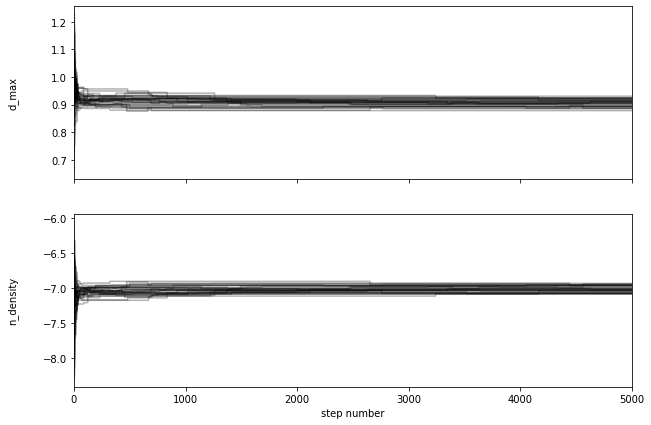

In [113]:
# Plot the chains.

fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["d_max", "n_density"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

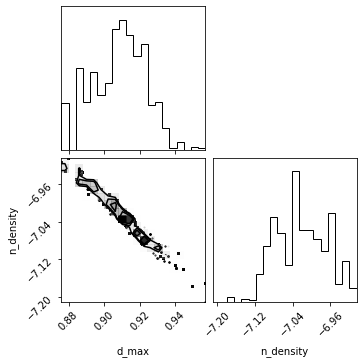

In [114]:
# Corner plot.

flat_samples = sampler.get_chain(discard=100,flat=True)

fig = corner.corner(
    flat_samples, labels=labels
);

These parameters are correlated, but it seems that the fit does strongly converge on them.

Now, let's make the plots that actually appear in the paper:

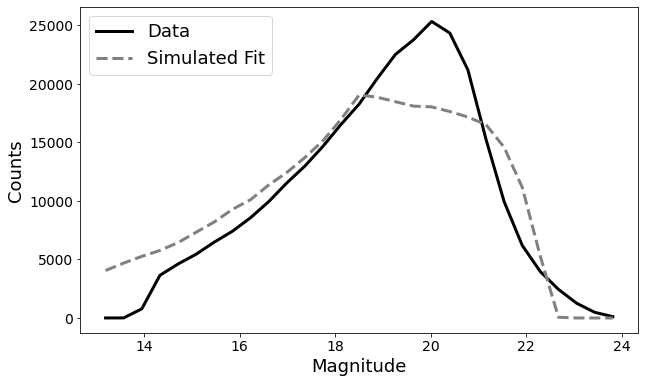

In [115]:
plt.figure(figsize=(10, 6))
results = np.mean(flat_samples, axis=0)

bins=np.linspace(13, 24, 30)

theta = results
counts, _ = model_counts(theta,bins=bins)
counts_d, _ = np.histogram(mf, bins=bins)

plt.plot((bins[1:]+bins[:-1])/2, counts_d, label="Data", color="black", linewidth=3)
plt.plot((bins[1:]+bins[:-1])/2, counts, label="Simulated Fit", ls="--", linewidth=3, color="gray")

plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("Counts", fontsize=18)
plt.legend(fontsize=18, loc="upper left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("sim_counts")

In [1]:
plt.figure(figsize=(10, 6))
results = np.mean(flat_samples, axis=0)

bins=np.linspace(-10, 0, 50)

theta = results
theta2 = np.copy(results)
theta2[0]=2 # Complete out to 2 kpc.

theta[1]+=4 # Increase the number density, just so that we are less at the mercy of small number statistics.
theta2[1]+=4

counts, _ = model_counts(theta,bins=bins)
counts2, _ = model_counts(theta2,bins=bins)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
    
counts_d, _ = np.histogram(mf, bins=bins)


plt.plot((bins[1:]+bins[:-1])/2, counts, label="Best-Fitting Model", ls="--", linewidth=3, color="gray")
plt.plot((bins[1:]+bins[:-1])/2, counts2, label="Complete to 2 kpc", ls="--", linewidth=3, color="lightgray")

plt.xlabel("Magnitude", fontsize=18)
plt.legend(fontsize=18, loc="upper left")
plt.yscale("log")

#plt.ylim(-1000, 30000)
plt.ylabel("Counts", fontsize=18)
plt.savefig("sim_counts_complete", dpi=400)
plt.ylim(1, 1e5)

NameError: name 'plt' is not defined

In [ ]:
plt.plot((bins[1:]+bins[:-1])/2, counts/counts2, ".k")
plt.xlim(-8, 0)
plt.ylim(0, 1.5)
plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("N$_{fit}$/N$_{2 kpc}$", fontsize=18)
plt.axhline(1, color="gray", ls="--")
plt.savefig("sim_counts_complete", dpi=300)

In [123]:
# Print the best-fitting parameters.
v_m, v, v_p = np.quantile(flat_samples[:, 0]*1000, (0.16, .5, .84))

print("{v:.3f} + {p:.3f} - {m:.3f}".format(v=v, m=v-v_m, p=v_p-v))


v_m, v, v_p = np.quantile(np.e**flat_samples[:, 1], (0.16, .5, .84))

print("{v:.6e} + {p:.6e} - {m:.6e}".format(v=v, m=v-v_m, p=v_p-v))



909.722 + 13.937 - 17.727
8.888077e-04 + 5.752973e-05 - 4.382207e-05


Now, let's move on to considering the spread_model parameter, discussed primarily in Section 2.3.

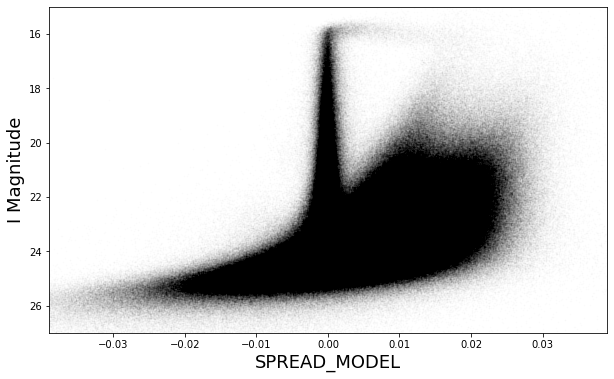

In [91]:
# Plot without any additional labels.

bins_i = np.linspace(15, 28, 21)
med_errs = np.zeros(len(bins_i)-1)
for i in range(len(bins_i)-1):
    med_errs[i] = np.median(d1.spreaderr_i[np.where((d1.i>bins_i[i])&(d1.i<bins_i[i+1]))])
    

plt.figure(figsize=(10, 6))
#plt.gca().invert_yaxis()
plt.xlabel("SPREAD_MODEL", fontsize=18)
plt.ylabel("I Magnitude", fontsize=18)
plt.errorbar(d1.spread_i, d1.i, markersize=1, alpha=.01, fmt=".k", color="black", zorder=0)
#plt.axvline(0, color="C2", zorder=1, lw=3, label="SPREAD_MODEL = 0")

plt.xlim(-0.039, 0.039)
plt.ylim(27, 15)

#plt.plot(med_errs, (bins_i[1:]+bins_i[:-1])/2, ls="-.", color="C3", linewidth=3, zorder=2, label="Median Error")
#plt.legend(fontsize=18)
plt.savefig("spread_model_nolabel", dpi=300)

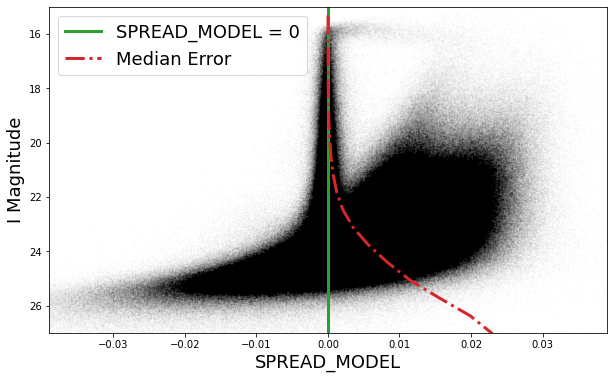

In [92]:
# Plot with median errors included.

bins_i = np.linspace(15, 28, 21)
med_errs = np.zeros(len(bins_i)-1)
for i in range(len(bins_i)-1):
    med_errs[i] = np.median(d1.spreaderr_i[np.where((d1.i>bins_i[i])&(d1.i<bins_i[i+1]))])
    

plt.figure(figsize=(10, 6))
#plt.gca().invert_yaxis()
plt.xlabel("SPREAD_MODEL", fontsize=18)
plt.ylabel("I Magnitude", fontsize=18)
plt.errorbar(d1.spread_i, d1.i, markersize=1, alpha=.01, fmt=".k", color="black", zorder=0)
plt.axvline(0, color="C2", zorder=1, lw=3, label="SPREAD_MODEL = 0")

plt.xlim(-0.039, 0.039)
plt.ylim(27, 15)

plt.plot(med_errs, (bins_i[1:]+bins_i[:-1])/2, ls="-.", color="C3", linewidth=3, zorder=2, label="Median Error")
plt.legend(fontsize=18)
plt.savefig("spread_model", dpi=300)

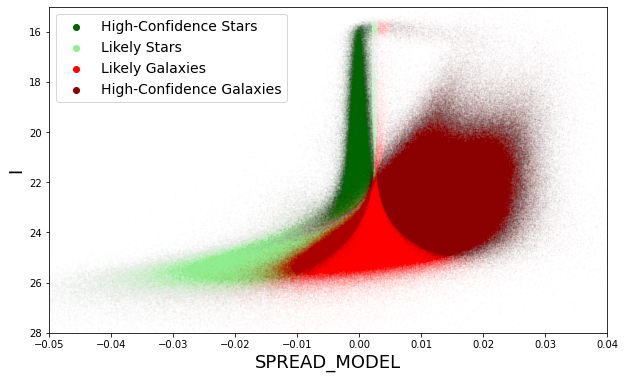

In [94]:
# Stars colored by their class in extended_coadd.

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.xlabel("SPREAD_MODEL", fontsize=18)
plt.ylabel("I", fontsize=18)

nstdev = 10

nco0 = np.where((d1.class_coadd==0))[0]
nco1 = np.where((d1.class_coadd==1))[0]
nco2 = np.where((d1.class_coadd==2))[0]
nco3 = np.where((d1.class_coadd==3))[0]



plt.scatter(d1.spread_i[nco0], d1.i[nco0], s=1, alpha=0.01, color="darkgreen", label="High-Confidence Stars")
plt.scatter(d1.spread_i[nco1], d1.i[nco1],s=1, alpha=0.01, color="lightgreen", label="Likely Stars")
plt.scatter(d1.spread_i[nco2], d1.i[nco2],s=1, alpha=0.01, color="red", label="Likely Galaxies")
plt.scatter(d1.spread_i[nco3], d1.i[nco3],s=1, alpha=0.01, color="darkred", label="High-Confidence Galaxies")

leg= plt.legend(fontsize=14, markerscale=6, loc="upper left")
for lh in leg.legendHandles: 
    lh.set_alpha(1)


plt.xlim(-.05, .04)
plt.ylim(28, 15)
plt.savefig("spread_model_stars", dpi=300)
plt.show()


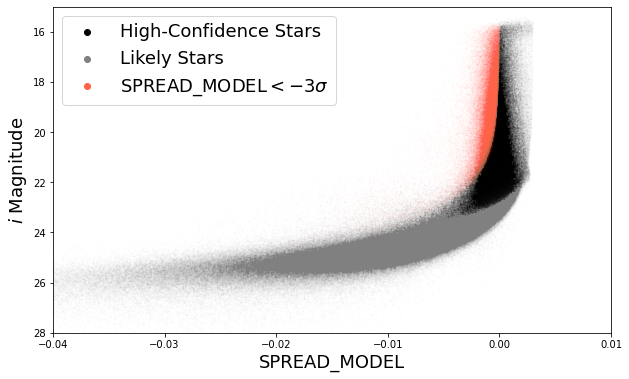

In [96]:
# Only the high-confidence and likely stars.  
# Also plotted are the points that are 3sigma from zero.

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.xlabel("SPREAD_MODEL", fontsize=18)
plt.ylabel("$i$ Magnitude", fontsize=18)

nstdev = 3

neg = np.where(d1.spread_i + d1.spreaderr_i*nstdev < 0)[0]
nco0 = np.where((d1.spread_i + d1.spreaderr_i*nstdev >= 0) & (d1.class_coadd==0))[0]
nco1 = np.where((d1.spread_i + d1.spreaderr_i*nstdev >= 0) & (d1.class_coadd==1))[0]

plt.scatter(d1.spread_i[nco0], d1.i[nco0], s=1, alpha=0.01, color="Black", label="High-Confidence Stars")
plt.scatter(d1.spread_i[nco1], d1.i[nco1],s=1, alpha=0.01, color="Gray", label="Likely Stars")


plt.scatter(d1.spread_i[neg], d1.i[neg],s=1, alpha=.01, color="Tomato", label="SPREAD_MODEL$<-3\sigma$")

leg= plt.legend(fontsize=18, markerscale=6)
for lh in leg.legendHandles: 
    lh.set_alpha(1)


plt.xlim(-.04, .01)
plt.ylim(28, 15)
plt.savefig("spread_model_stars", dpi=300)
plt.show()


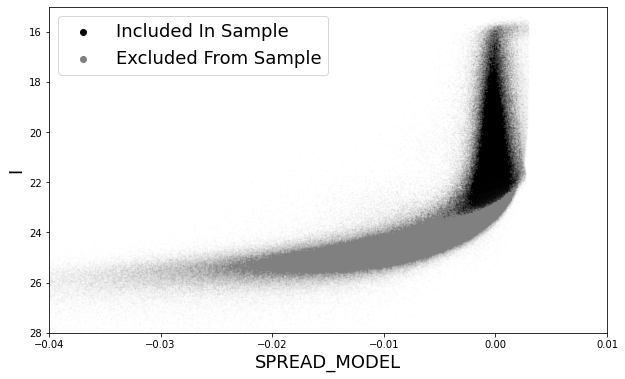

In [97]:
# Plot that visualizes which objects we are including in the sample.
# Mostly for the talk.

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.xlabel("SPREAD_MODEL", fontsize=18)
plt.ylabel("I", fontsize=18)

nstdev = 10

neg = np.where(d1.spread_i + d1.spreaderr_i*nstdev < 0)[0]
nco0 = np.where((d1.spread_i + d1.spreaderr_i*nstdev >= 0) & (d1.class_coadd==0))[0]
nco1 = np.where((d1.spread_i + d1.spreaderr_i*nstdev >= 0) & (d1.class_coadd==1))[0]

plt.scatter(d1.spread_i[nco0], d1.i[nco0], s=1, alpha=0.01, color="Black", label="Included In Sample")
plt.scatter(d1.spread_i[nco1], d1.i[nco1],s=1, alpha=0.01, color="Gray", label="Excluded From Sample")
#plt.scatter(d1.spread_i[d1.class_coadd==2], d1.i[d1.class_coadd==2],s=1, alpha=0.3, color="C2", label="Likely Galaxies")


plt.scatter(d1.spread_i[neg], d1.i[neg],s=1, alpha=.01, color="Black")
leg= plt.legend(fontsize=18, markerscale=6)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

#plt.axvline(0, color="C2", zorder=1, lw=3, label="SPREAD_MODEL = 0")

plt.xlim(-.04, .01)
plt.ylim(28, 15)
plt.savefig("spread_model_stars_sample", dpi=300)
plt.show()


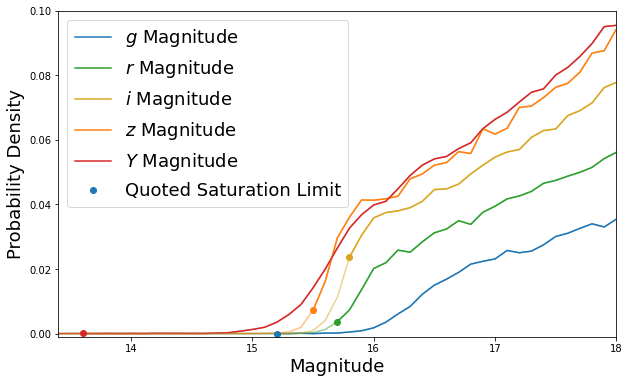

In [98]:
# Number of stars at each magnitude, as a function of magnitude.
# Also plotted are the saturation limits.

c0 = np.where(d1.class_coadd==0)

min_all = np.min([np.min(d1.g[c0]),
       np.min(d1.r[c0]),
       np.min(d1.i[c0]),
       np.min(d1.z[c0]),
       np.min(d1.y[c0])])

max_all = np.max([np.max(d1.g[c0]),
       np.max(d1.r[c0]),
       np.max(d1.i[c0]),
       np.max(d1.z[c0]),
       np.max(d1.y[c0])])


bins = np.arange(13.35, 36.75, 0.1)


counts_g, _ = np.histogram(d1.g[c0], bins, density=True)
counts_r, _ = np.histogram(d1.r[c0], bins, density=True)
counts_i, _ = np.histogram(d1.i[c0], bins, density=True)
counts_z, _ = np.histogram(d1.z[c0], bins, density=True)
counts_y, _ = np.histogram(d1.y[c0], bins, density=True)

plt.figure(figsize=(10, 6))

bins_plot = (bins[1:] + bins[:-1])/2

# Saturation magnitudes from DES DR2. 
idx_g = np.where(abs(bins_plot-15.2)==np.min(abs(bins_plot-15.2)))[0][0]
idx_r = np.where(abs(bins_plot-15.7)==np.min(abs(bins_plot-15.7)))[0][0]
idx_i = np.where(abs(bins_plot-15.8)==np.min(abs(bins_plot-15.8)))[0][0]
idx_z = np.where(abs(bins_plot-15.5)==np.min(abs(bins_plot-15.5)))[0][0]
idx_y = np.where(abs(bins_plot-13.6)==np.min(abs(bins_plot-13.6)))[0][0]


plt.plot(bins_plot[idx_g:], counts_g[idx_g:], color="C0", label="$g$ Magnitude")
plt.plot(bins_plot[idx_r:], counts_r[idx_r:], color="C2", label="$r$ Magnitude")
plt.plot(bins_plot[idx_i:], counts_i[idx_i:], color="goldenrod", label="$i$ Magnitude")
plt.plot(bins_plot[idx_z:], counts_z[idx_z:], color="C1", label="$z$ Magnitude")
plt.plot(bins_plot[idx_y:], counts_y[idx_y:], color="C3", label="$Y$ Magnitude")

plt.plot(bins_plot[:-idx_g], counts_g[:-idx_g], color="C0",alpha=0.5)
plt.plot(bins_plot[:-idx_r], counts_r[:-idx_r], color="C2",  alpha=0.5)
plt.plot(bins_plot[:-idx_i], counts_i[:-idx_i], color="goldenrod",  alpha=0.5)
plt.plot(bins_plot[:-idx_z], counts_z[:-idx_z], color="C1", alpha=0.5)
plt.plot(bins_plot[:-idx_y], counts_y[:-idx_y], color="C3", alpha=0.5)

plt.plot(bins_plot[idx_g], counts_g[idx_g], "o", color="C0", label="Quoted Saturation Limit")
plt.plot(bins_plot[idx_r], counts_r[idx_r], "o", color="C2")
plt.plot(bins_plot[idx_i], counts_i[idx_i], "o", color="goldenrod")
plt.plot(bins_plot[idx_z], counts_z[idx_z], "o", color="C1")
plt.plot(bins_plot[idx_y], counts_y[idx_y], "o", color="C3")



plt.legend(fontsize=18)
plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("Probability Density", fontsize=18)
plt.xlim(13.4, 18)
plt.ylim(-0.001, 0.10)
#plt.yscale("log")
plt.savefig("DES_griz_counts", dpi=300)

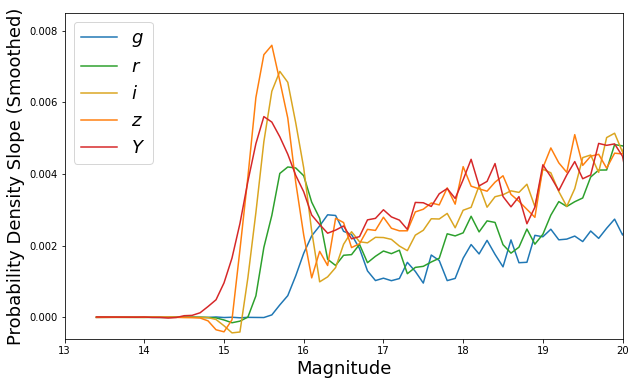

In [102]:
# Smoothed d(density) plot.
# Not smoothing it results in something so noisy, it is unusable.

plt.figure(figsize=(10, 6))

n1 = 11
n2 = 2

x = bins_plot[:-1]


plt.plot(x, savgol_filter(counts_g[1:], n1, n2)-savgol_filter(counts_g[:-1], n1, n2), color="C0", label="$g$")
plt.plot(x, savgol_filter(counts_r[1:], n1, n2)-savgol_filter(counts_r[:-1], n1, n2), color="C2", label="$r$")
plt.plot(x, savgol_filter(counts_i[1:], n1, n2)-savgol_filter(counts_i[:-1], n1, n2), color="goldenrod", label="$i$")
plt.plot(x, savgol_filter(counts_z[1:], n1, n2)-savgol_filter(counts_z[:-1], n1, n2), color="C1", label="$z$")
plt.plot(x, savgol_filter(counts_y[1:], n1, n2)-savgol_filter(counts_y[:-1], n1, n2), color="C3", label="$Y$")
plt.xlim(13, 20)
#plt.axvline(16.3)

plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("Probability Density Slope (Smoothed)", fontsize=18)
plt.legend(fontsize=18)
plt.ylim(-0.0006, 0.0085)

plt.savefig("DES_griz_diff", dpi=300)

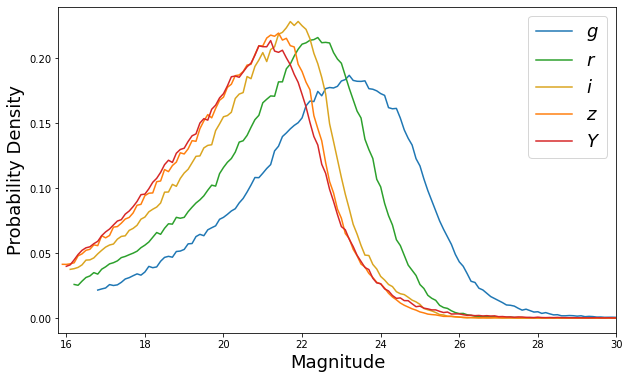

In [103]:
# Number counts versus magnitude, but with each band cutoff
# around the saturation magnitude.

min_all = np.min([np.min(d1.g[c0]),
       np.min(d1.r[c0]),
       np.min(d1.i[c0]),
       np.min(d1.z[c0]),
       np.min(d1.y[c0])])

max_all = np.max([np.max(d1.g[c0]),
       np.max(d1.r[c0]),
       np.max(d1.i[c0]),
       np.max(d1.z[c0]),
       np.max(d1.y[c0])])


bins = np.arange(13.35, 36.75, 0.1)


counts_g, _ = np.histogram(d1.g[c0], bins, density=True)
counts_r, _ = np.histogram(d1.r[c0], bins, density=True)
counts_i, _ = np.histogram(d1.i[c0], bins, density=True)
counts_z, _ = np.histogram(d1.z[c0], bins, density=True)
counts_y, _ = np.histogram(d1.y[c0], bins, density=True)

plt.figure(figsize=(10, 6))

bins_plot = (bins[1:] + bins[:-1])/2

idx_g = 16.9
idx_r = 16.3
idx_i = 16.2
idx_z = 16.1
idx_y = 16.3

idx_g = np.where(abs(bins_plot-16.8)==np.min(abs(bins_plot-16.8)))[0][0]
idx_r = np.where(abs(bins_plot-16.2)==np.min(abs(bins_plot-16.2)))[0][0]
idx_i = np.where(abs(bins_plot-16.1)==np.min(abs(bins_plot-16.1)))[0][0]
idx_z = np.where(abs(bins_plot-15.9)==np.min(abs(bins_plot-15.9)))[0][0]
idx_y = np.where(abs(bins_plot-16.0)==np.min(abs(bins_plot-16.0)))[0][0]


plt.plot(bins_plot[idx_g:], counts_g[idx_g:], color="C0", label="$g$")
plt.plot(bins_plot[idx_r:], counts_r[idx_r:], color="C2", label="$r$")
plt.plot(bins_plot[idx_i:], counts_i[idx_i:], color="goldenrod", label="$i$")
plt.plot(bins_plot[idx_z:], counts_z[idx_z:], color="C1", label="$z$")
plt.plot(bins_plot[idx_y:], counts_y[idx_y:], color="C3", label="$Y$")


plt.legend(fontsize=18)
plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("Probability Density", fontsize=18)
plt.xlim(15.8, 30)
#plt.ylim(0, 0.10)
#plt.yscale("log")
plt.savefig("DES_griz_counts_full", dpi=300)

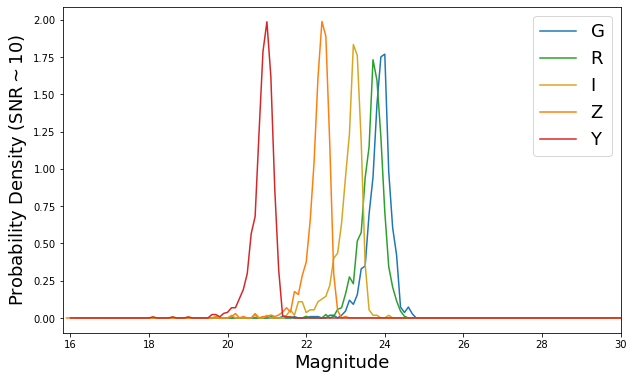

In [104]:
# Plot of counts vs magnitude, but only for objects with a SNR~10.

plt.figure(figsize=(10, 6))

dm = 2.5/np.log(10)/10
delta_m = 0.001

g_idx = np.where((d1.gerr[c0]>dm-delta_m)&(d1.gerr[c0]<dm+delta_m))[0]
r_idx = np.where((d1.rerr[c0]>dm-delta_m)&(d1.rerr[c0]<dm+delta_m))[0]
i_idx = np.where((d1.ierr[c0]>dm-delta_m)&(d1.ierr[c0]<dm+delta_m))[0]
z_idx = np.where((d1.zerr[c0]>dm-delta_m)&(d1.zerr[c0]<dm+delta_m))[0]
y_idx = np.where((d1.yerr[c0]>dm-delta_m)&(d1.yerr[c0]<dm+delta_m))[0]

counts_g, _ = np.histogram(d1.g[c0][g_idx], bins, density=True)
counts_r, _ = np.histogram(d1.r[c0][r_idx], bins, density=True)
counts_i, _ = np.histogram(d1.i[c0][i_idx], bins, density=True)
counts_z, _ = np.histogram(d1.z[c0][z_idx], bins, density=True)
counts_y, _ = np.histogram(d1.y[c0][y_idx], bins, density=True)

plt.plot(bins_plot[idx_g:], counts_g[idx_g:], color="C0", label="G")
plt.plot(bins_plot[idx_r:], counts_r[idx_r:], color="C2", label="R")
plt.plot(bins_plot[idx_i:], counts_i[idx_i:], color="goldenrod", label="I")
plt.plot(bins_plot[idx_z:], counts_z[idx_z:], color="C1", label="Z")
plt.plot(bins_plot[idx_y:], counts_y[idx_y:], color="C3", label="Y")


plt.legend(fontsize=18)
plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("Probability Density (SNR$\sim$10)", fontsize=18)
plt.xlim(15.8, 30)
#plt.ylim(0, 0.10)
#plt.yscale("log")
plt.savefig("DES_griz_counts_magerr", dpi=300)

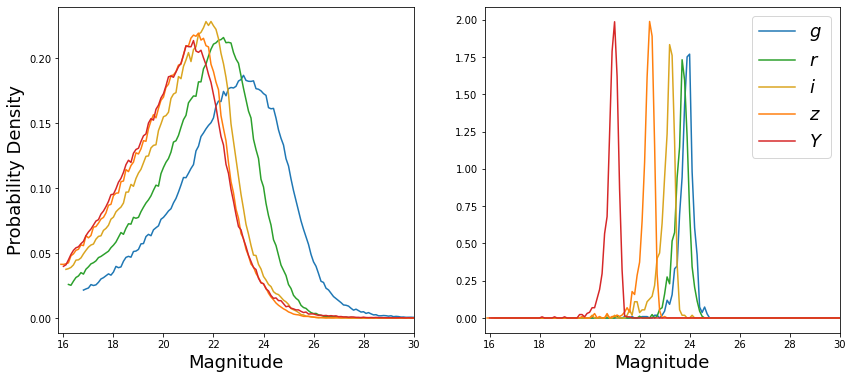

In [106]:
# Multipanel plot of the two previous plots, for use in paper.

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14, 6))


min_all = np.min([np.min(d1.g[c0]),
       np.min(d1.r[c0]),
       np.min(d1.i[c0]),
       np.min(d1.z[c0]),
       np.min(d1.y[c0])])

max_all = np.max([np.max(d1.g[c0]),
       np.max(d1.r[c0]),
       np.max(d1.i[c0]),
       np.max(d1.z[c0]),
       np.max(d1.y[c0])])


bins = np.arange(13.35, 36.75, 0.1)


counts_g, _ = np.histogram(d1.g[c0], bins, density=True)
counts_r, _ = np.histogram(d1.r[c0], bins, density=True)
counts_i, _ = np.histogram(d1.i[c0], bins, density=True)
counts_z, _ = np.histogram(d1.z[c0], bins, density=True)
counts_y, _ = np.histogram(d1.y[c0], bins, density=True)

bins_plot = (bins[1:] + bins[:-1])/2

#idx_g = 16.8
#idx_r = 16.2
#idx_i = 16.1
#idx_z = 15.9
#idx_y = 16.0

idx_g = 16.9
idx_r = 16.3
idx_i = 16.2
idx_z = 16.1
idx_y = 16.3

idx_g = np.where(abs(bins_plot-16.8)==np.min(abs(bins_plot-16.8)))[0][0]
idx_r = np.where(abs(bins_plot-16.2)==np.min(abs(bins_plot-16.2)))[0][0]
idx_i = np.where(abs(bins_plot-16.1)==np.min(abs(bins_plot-16.1)))[0][0]
idx_z = np.where(abs(bins_plot-15.9)==np.min(abs(bins_plot-15.9)))[0][0]
idx_y = np.where(abs(bins_plot-16.0)==np.min(abs(bins_plot-16.0)))[0][0]

#plt.subplots_adjust(wspace=0)
ax1.plot(bins_plot[idx_g:], counts_g[idx_g:], color="C0", label="$g$")
ax1.plot(bins_plot[idx_r:], counts_r[idx_r:], color="C2", label="$r$")
ax1.plot(bins_plot[idx_i:], counts_i[idx_i:], color="goldenrod", label="$i$")
ax1.plot(bins_plot[idx_z:], counts_z[idx_z:], color="C1", label="$z$")
ax1.plot(bins_plot[idx_y:], counts_y[idx_y:], color="C3", label="$Y$")


ax1.set_xlabel("Magnitude", fontsize=18)
ax1.set_ylabel("Probability Density", fontsize=18)
ax1.set_xlim(15.8, 30)
#plt.ylim(0, 0.10)
#plt.yscale("log")
#plt.savefig("DES_griz_counts_full", dpi=300)


dm = 2.5/np.log(10)/10
delta_m = 0.001

g_idx = np.where((d1.gerr[c0]>dm-delta_m)&(d1.gerr[c0]<dm+delta_m))[0]
r_idx = np.where((d1.rerr[c0]>dm-delta_m)&(d1.rerr[c0]<dm+delta_m))[0]
i_idx = np.where((d1.ierr[c0]>dm-delta_m)&(d1.ierr[c0]<dm+delta_m))[0]
z_idx = np.where((d1.zerr[c0]>dm-delta_m)&(d1.zerr[c0]<dm+delta_m))[0]
y_idx = np.where((d1.yerr[c0]>dm-delta_m)&(d1.yerr[c0]<dm+delta_m))[0]

counts_g, _ = np.histogram(d1.g[c0][g_idx], bins, density=True)
counts_r, _ = np.histogram(d1.r[c0][r_idx], bins, density=True)
counts_i, _ = np.histogram(d1.i[c0][i_idx], bins, density=True)
counts_z, _ = np.histogram(d1.z[c0][z_idx], bins, density=True)
counts_y, _ = np.histogram(d1.y[c0][y_idx], bins, density=True)
ax2.plot(bins_plot[idx_g:], counts_g[idx_g:], color="C0", label="$g$")
ax2.plot(bins_plot[idx_r:], counts_r[idx_r:], color="C2", label="$r$")
ax2.plot(bins_plot[idx_i:], counts_i[idx_i:], color="goldenrod", label="$i$")
ax2.plot(bins_plot[idx_z:], counts_z[idx_z:], color="C1", label="$z$")
ax2.plot(bins_plot[idx_y:], counts_y[idx_y:], color="C3", label="$Y$")

ax2.legend(fontsize=18)
ax2.set_xlabel("Magnitude", fontsize=18)

plt.savefig("des_completeness", dpi=300)